In [1]:
import numpy as np
import dolfin as dl
import matplotlib.pyplot as plt

from nalger_helper_functions import box_mesh_nd, box_mesh_lexsort

Text(0.5, 1.0, 'original ordering')

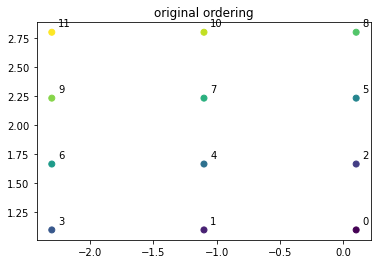

In [2]:
min_pt = np.array([0.1, 2.8])
max_pt = np.array([-2.3, 1.1])
grid_shape = (3,4)

mesh = box_mesh_nd(min_pt, max_pt, grid_shape)
V = dl.FunctionSpace(mesh, 'CG', 1)

X = V.tabulate_dof_coordinates()

plt.figure()
plt.scatter(X[:,0], X[:,1], c=np.arange(V.dim()))

buf = 0.05
for k, txt in enumerate(np.arange(V.dim())):
    plt.gca().annotate(txt, (X[k,0]+buf, X[k,1]+buf))

plt.title('original ordering')

Text(0.5, 1.0, 'lexsort ordering')

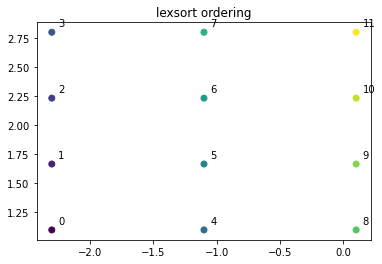

In [3]:
lexsort_inds = box_mesh_lexsort(V)

u = dl.Function(V)
u.vector()[lexsort_inds] = np.arange(V.dim())


X_sorted = X[lexsort_inds, :]

plt.figure()
plt.scatter(X_sorted[:,0], X_sorted[:,1], c=np.arange(V.dim()))

buf = 0.05
for k, txt in enumerate(np.arange(V.dim())):
    plt.gca().annotate(txt, (X_sorted[k,0]+buf, X_sorted[k,1]+buf))

plt.title('lexsort ordering')

# cm = dl.plot(u)
# plt.colorbar(cm)